# Final Project

## By Oliver Anderson, Frances Romero, Heather Terada

### Project Proposal

<strong>Introduction:</strong>
The objective of this machine learning project is to develop a predictive model that accurately estimates the prices of used cars based on various features and attributes. Our aim is to assist both buyers and sellers in making informed decisions about used car sales by providing reliable price estimations. Users can leverage the model to identify good or bad deals based on the actual and predicted prices of the vehicles. The project will involve data exploration, preprocessing, feature engineering, model selection, and evaluation to achieve the desired outcome.
The project seeks to address the following research questions: How accurately can the machine learning model predict the sale price of used cars based on the given features? Which features have the most significant impact on the car's price, according to the model? How does the performance of different machine learning algorithms (e.g. Multiple Linear Regression, K-Nearest Neighbor, and Random Forest) compare in predicting used car prices?

<strong>Data Description:</strong>
The dataset contains information on used cars in India, including make and model, year, mileage, fuel type, transmission type, number of previous owners, and whether the car is being sold individually or by a dealer. The dataset is sourced from Kaggle and comprises 1874 samples of used car listings after missing values have been removed.<br><br>
<strong>Dataset location:</strong><br>
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho<br>

<strong>Machine Learning Techniques:</strong>
For this project, we plan to implement the following machine learning techniques: Multiple Linear Regression: This method is suitable for predicting continuous numerical values, making it ideal for estimating used car prices. K-Nearest Neighbor (KNN): KNN can help identify similar cars based on feature similarities, which may aid in pricing comparisons. Random Forest: As a powerful ensemble technique, Random Forest can handle complex non-linear relationships between features and car prices effectively. Principal Component Analysis (PCA): PCA can help generate new features from the data that may be able to describe the complex relationships between particular features better than the features alone.
To assess the performance of our machine learning models, we will employ the following evaluation metrics for our models: Mean Squared Error (MSE): MSE measures the average squared difference between predicted and actual car prices. R-squared: R-squared indicates the proportion of variance in the target variable (car prices) that is predictable by the model.

<strong>Project Steps:</strong>
The project will follow these steps: Data Collection and Exploration: Gather the used car dataset and perform preliminary data exploration to understand its structure and characteristics. Data Preprocessing and Feature Engineering: Handle missing values, outliers, and perform feature engineering. Additionally, apply PCA to extract relevant features. Data Visualization: Visualize the relationships between different features and the target variable to gain insights into the data. Model Selection and Training: Implement the chosen machine learning algorithms and train them on the preprocessed dataset. Model Evaluation: Assess the performance of each model using the defined evaluation metrics. Conclusion and Future Work: Summarize the results, draw conclusions, and discuss possible avenues for further improvement. By successfully executing this project, we aim to provide a valuable tool for potential used car buyers and sellers, enhancing transparency and informed decision-making in the used car market.

## Import Libraries

In [59]:
# data modules
import numpy as np
import pandas as pd
import math

# visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# machine learning modules
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (cohen_kappa_score,
                            classification_report,
                            roc_auc_score,
                            )

## Importing, cleaning, and EDA (Exploratory Data Analysis)

Import the data set

In [2]:
usedcars = pd.read_csv("car_details_v4.csv")

Check out the features

In [3]:
usedcars.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


Get information about the data types and quality

In [4]:
# Overall view
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
# Examine data
usedcars.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [6]:
# Number of rows and columns
usedcars.shape

(2059, 20)

In [7]:
# Check for missing data
usedcars.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

Some of the rows have missing values so in the next step we will remove the NA values.

In [3]:
usedcars = usedcars.dropna(axis = 0, how = 'any')
usedcars.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [9]:
usedcars.shape

(1874, 20)

The missing values have been removed from the dataset.

In [4]:
# Duplicated values
usedcars.duplicated().sum()

0

There are no duplicated values.

In [11]:
# How is the data stored
usedcars.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

## Initial Visualizations

#### Create a stacked bar graph to see the trend of used cars sold by transmission type across the years

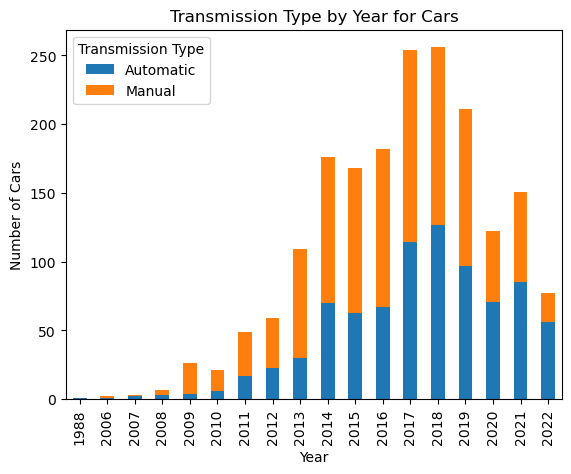

In [5]:
# Make dataframe
usedcars = pd.DataFrame(usedcars)

# Create dummy variables for each transmission type
usedcars_dummies = pd.get_dummies(usedcars['Transmission'])

# Concatenate the dummy variables with the original DataFrame
usedcars_stacked = pd.concat([usedcars['Year'], usedcars_dummies], axis=1)

# Group the data by Year and sum the transmission counts for each type
usedcars_stacked = usedcars_stacked.groupby('Year').sum().reset_index()

# Set 'Year' as the index for the DataFrame
usedcars_stacked.set_index('Year', inplace=True)

# Create a stacked bar chart
ax = usedcars_stacked.plot(kind='bar', stacked=True)

# Add labels and show the plot
plt.title('Transmission Type by Year for Cars')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(title='Transmission Type', loc='upper left')
plt.show()

#### Make a bargraph to see the trend of used cars sold by seat capacity across the years

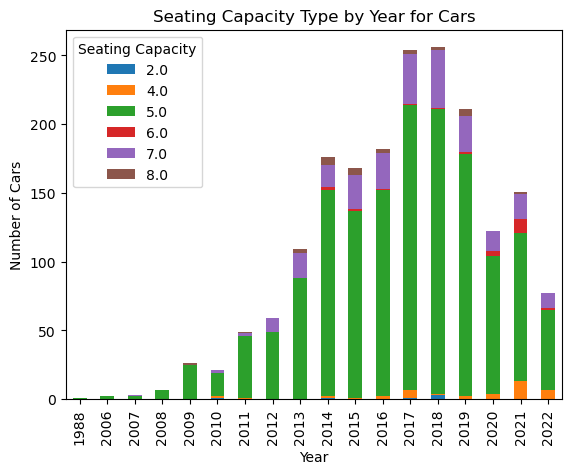

In [6]:
# Make dataframe
usedcars = pd.DataFrame(usedcars)

# Create dummy variables for each transmission type
usedcars_dummies = pd.get_dummies(usedcars['Seating Capacity'])

# Concatenate the dummy variables with the original DataFrame
usedcars_stacked = pd.concat([usedcars['Year'], usedcars_dummies], axis=1)

# Group the data by Year and sum the transmission counts for each type
usedcars_stacked = usedcars_stacked.groupby('Year').sum().reset_index()

# Set 'Year' as the index for the DataFrame
usedcars_stacked.set_index('Year', inplace=True)

# Create a stacked bar chart
ax = usedcars_stacked.plot(kind='bar', stacked=True)

# Add labels and show the plot
plt.title('Seating Capacity Type by Year for Cars')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(title='Seating Capacity', loc='upper left')
plt.show()

#### Is there a trend between mileage and price?

In [7]:
# grab the values from the dataset
kilometers = usedcars['Kilometer']
prices_INR = usedcars['Price']

We noticed that since the data is sourced from India, the currency and distance are not in the units that we understand in the United States. Thus we must convert INR to USD and kilometers to miles.

In [8]:
# Conversion function from kilometers to miles
def kilometers_to_miles(km):
    return km * 0.6213712

# Apply the conversion function to the DataFrame column
mileage = kilometers.apply(kilometers_to_miles)

In [9]:
# Adding columns to dataset
usedcars['Miles'] = usedcars['Kilometer'].apply(kilometers_to_miles)
# usedcars['log_miles'] = np.log10(usedcars['Miles'])

In [10]:
# Conversion function from INR to USD
def INR_to_USD(inr):
    return inr * 0.012

# Apply the conversion function to the DataFrame column
prices_USD = prices_INR.apply(INR_to_USD)
prices_USD

0        6060.0
1        5400.0
2        2640.0
3        9588.0
4       23400.0
         ...   
2053     2940.0
2054    10200.0
2055     3300.0
2056     2880.0
2057    51480.0
Name: Price, Length: 1874, dtype: float64

In [11]:
# Adding columns to dataset
usedcars['USD'] = usedcars['Price'].apply(INR_to_USD)
# usedcars['log_USD'] = np.log10(usedcars['USD'])

Once converted to understandable units, we plot the relationship between price and mileage.

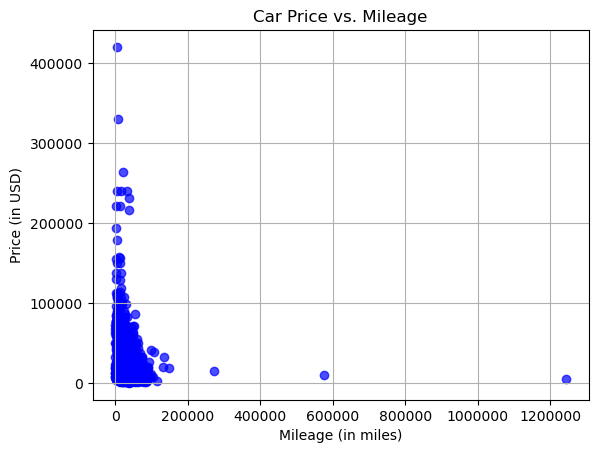

In [12]:
plt.scatter(mileage, prices_USD, c='blue', alpha=0.7)
plt.xlabel("Mileage (in miles)")
plt.ylabel("Price (in USD)")
plt.title("Car Price vs. Mileage")
plt.grid(True)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

Most cars are under 200,000 miles and cars with lower mileage sell for higher. For our model we may need to take the log of price and mileage because we have outliers. 


In [13]:
# quickly check the data type of the mileage variable
mileage.dtype


dtype('float64')

In [14]:
# quickly check the data type of the prices_USD variable
prices_USD.dtype

dtype('float64')

/Users/slimeollie/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


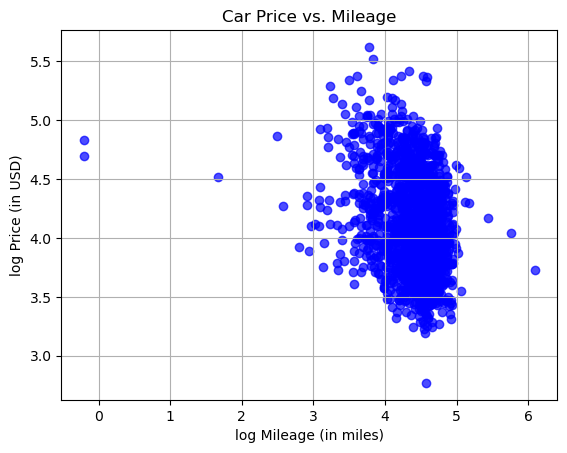

In [15]:
# generate a new scatter using log10(mileage) and log10(prices_USD)
plt.scatter(np.log10(mileage), np.log10(prices_USD), c='blue', alpha=0.7)
plt.xlabel("log Mileage (in miles)")
plt.ylabel("log Price (in USD)")
plt.title("Car Price vs. Mileage")
plt.grid(True)
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

The clarity of the new plot seems to indicate that log values may be more useful in the model. We will experiment with log and regular values to determine the best way to organize the data in the model.

#### Create a heatmap to show associated numerical values

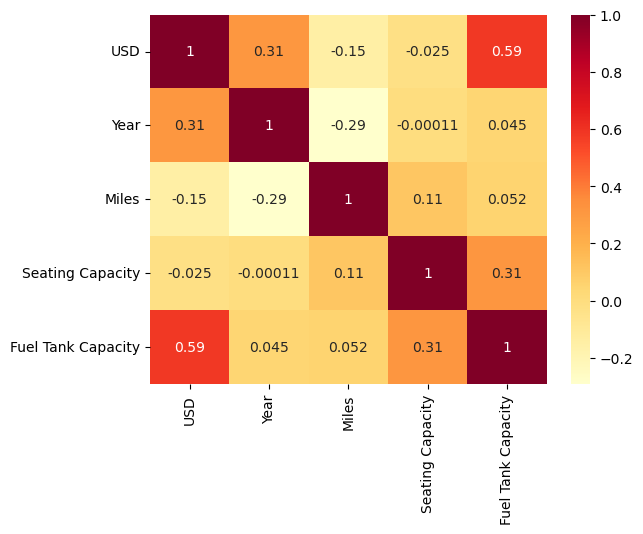

In [16]:
# Select some columns that might have a correlation
numerical_data = usedcars[['USD','Year','Miles', 'Seating Capacity', 'Fuel Tank Capacity']]
correlation_matrix = numerical_data.corr()

# Generate the heatmap and use a new color sheme
ax = sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd");
fig = ax.get_figure()

In [17]:
# check the lowest price car in the dataset
usedcars['USD'].min()

588.0

## Preprocessing the Data
Now that we see that most of the features are categorical data, thus we should convert these to dummy columns for the ML models.

In [18]:
# lets engineer dummy columns from the categorical variables
# first lets get the list of all the categorical variables
categorical_columns = usedcars.select_dtypes(include=['object']).columns
# then lets convert these to dummies using pd.get_dummies
usedcars_ML = pd.get_dummies(usedcars, columns=categorical_columns, drop_first=True) # drop_first=True set to avoid potential collinearity issues
# now check if the change worked correctly
usedcars_ML.head() # looks good

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Miles,USD,...,Max Torque_95 Nm @ 4000 rpm,Max Torque_96 Nm @ 3000 rpm,Max Torque_96 Nm @ 3500 rpm,Max Torque_98 Nm @ 3000 rpm,Max Torque_99 Nm @ 4500 rpm,Max Torque_99.08 Nm @ 4500 rpm,Max Torque_99.081 Nm @ 4500 rpm,Max Torque_99@2800,Drivetrain_FWD,Drivetrain_RWD
0,505000,2017,87150,3990.0,1680.0,1505.0,5.0,35.0,54152.50008,6060.0,...,0,0,0,0,0,0,0,0,1,0
1,450000,2014,75000,3995.0,1695.0,1555.0,5.0,42.0,46602.84000,5400.0,...,0,0,0,0,0,0,0,0,1,0
2,220000,2011,67000,3585.0,1595.0,1550.0,5.0,35.0,41631.87040,2640.0,...,0,0,0,0,0,0,0,0,1,0
3,799000,2019,37500,3995.0,1745.0,1510.0,5.0,37.0,23301.42000,9588.0,...,0,0,0,0,0,0,0,0,1,0
4,1950000,2018,69000,4735.0,1830.0,1795.0,7.0,55.0,42874.61280,23400.0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# lets drop the original kilometer and price columns
usedcars_ML = usedcars_ML.drop(['Kilometer', 'Price'], axis=1)

In [36]:
# convert into categorical format for easier predictions
bin_labels = ["Very Low", "Low", "Medium", "High", "Very High"]
usedcars_ML['Price Category'] = pd.qcut(usedcars_ML['USD'], 5, labels=bin_labels)
pd.qcut(usedcars_ML['USD'], 5, labels=bin_labels, retbins=True)

(0             Low
 1        Very Low
 2        Very Low
 3          Medium
 4            High
           ...    
 2053     Very Low
 2054       Medium
 2055     Very Low
 2056     Very Low
 2057    Very High
 Name: USD, Length: 1874, dtype: category
 Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High'],
 array([   588.,   5400.,   8100.,  13200.,  28920., 420000.]))

Bins are $588-$5400, $5400-$8100, $8100-$13200, $13200-$28920, $28920-$42000.

In [37]:
usedcars_ML=usedcars_ML.drop('USD', axis=1)

In this step we converted all categorical variables to binary variables for the purpose of the model. In addition, we included the drop_first=True tag to drop one of the categorical variables when converting to binary variables. This helps mitigate multi-collinearity when the presence of one variable indicates the lack of presence of another. By dropping one of the variables, we can reduce the effect of the double encoded value (for example a 1 in Make_BMW may always indicate a 0 in Make_Chevrolet, thus the including both in the model may artifically increase the effect of the double encoded value).

In [38]:
# lets export our cleaned data to a csv file
usedcars_ML.to_csv('ML_usedcars.csv', index=False)

## Feature Engineering & Feature Selection

In [39]:
# Split the data into features (X) and the target variable (y)
X = usedcars_ML.drop(['Price Category'], axis=1)
y = usedcars_ML['Price Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The first step before doing any of the other algorithms is to reduce the dimensionality of the data with PCA.

## PCA

In [48]:
# Applying PCA function on training
# and testing set of X component
def perform_pca(data, target_variable):
    # Separate the target variable from the features
    X = data.drop(target_variable, axis=1)
    y = data[target_variable]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    principal_components = pca.fit_transform(X_scaled)
    
    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    # Cumulative explained variance
    cum_explained_variance = np.cumsum(explained_variance_ratio)
    
    # Feature importance within each component
    feature_importance = pca.components_
    
    # Create a DataFrame to store the results
    pca_results = pd.DataFrame({
        'Principal Component': range(1, len(explained_variance_ratio) + 1),
        'Explained Variance Ratio': explained_variance_ratio,
        'Cumulative Explained Variance': cum_explained_variance
    })
    # Plot cumulative explained variance
    plt.plot(range(1, len(explained_variance_ratio) + 1), cum_explained_variance, marker='o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance by Principal Component')
    plt.grid(True)
    plt.show()
    
    # Print feature importance within each component for the top 5 components and importance > 0.25
    num_components = min(650, len(feature_importance))
    importance_threshold = 0.25
    for i in range(num_components):
        component_importance = feature_importance[i]
        relevant_features = [feat for j, feat in enumerate(X.columns) if abs(component_importance[j]) > importance_threshold]
        if len(relevant_features) > 0:
            print(f"\nPrincipal Component {i+1} - Feature Importance:")
            for feat in relevant_features:
                print(f"{feat}: {component_importance[X.columns.get_loc(feat)]}")
                
    # Rejoin the first num_components of PCA transformed data with the target variable
    modelDs = pd.concat([pd.DataFrame(principal_components[:, :num_components]), y], axis=1)
    
    # Return the PCA results, transformed data, and the target variable
    return pca_results, pd.DataFrame(principal_components[:, :num_components], columns=[f'PC{i}' for i in range(1, num_components + 1)]), y

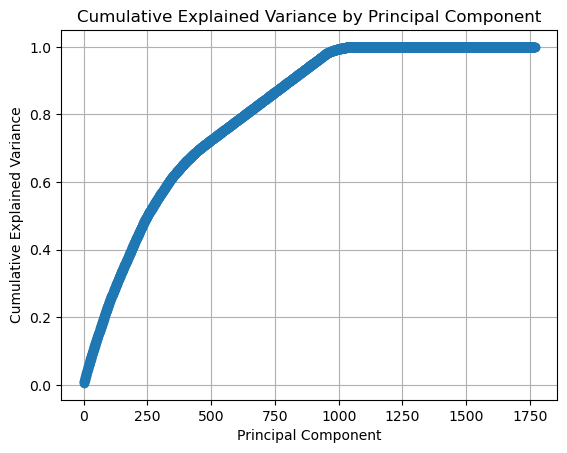


Principal Component 1 - Feature Importance:
Length: 0.2663846002971654
Width: 0.2667164285000274
Fuel Tank Capacity: 0.28022613120722656
Drivetrain_FWD: -0.26352869100746784

Principal Component 4 - Feature Importance:
Make_Lexus: 0.2812533007744507
Model_ES 300h Exquisite [2020-2021]: 0.32649459555656224
Fuel Type_Hybrid: 0.3150568776201968
Engine_2487 cc: 0.32649459555656224
Max Power_176 bhp @ 5700 rpm: 0.32649459555656224
Max Torque_221 Nm @ 3600 rpm: 0.32649459555656224

Principal Component 5 - Feature Importance:
Make_Mitsubishi: 0.38356094470047974
Engine_2477 cc: 0.2994162463148564
Max Power_176 bhp @ 4000 rpm: 0.2994162463148564
Max Torque_350 Nm @ 1800 rpm: 0.25064513799856125

Principal Component 9 - Feature Importance:
Make_Toyota: -0.2596250596030438

Principal Component 10 - Feature Importance:
Make_Ferrari: 0.41423564551960557
Model_488 GTB: 0.41423564551960584
Engine_3902 cc: 0.4142356455196058
Max Power_660 bhp @ 8000 rpm: 0.4142356455196058
Max Torque_760 Nm @ 3000 r

In [49]:
# Call the PCA function
pca_results, transformed_data, target_variable = perform_pca(usedcars_ML, 'Price Category')

# Print the PCA results
print("\nPCA Results:")
print(pca_results)

# Print the transformed data
print("\nTransformed Data:")
print(transformed_data)

# Print the target variable
print("\nTarget Variable:")
print(target_variable)

# Verify dimensions
if transformed_data.shape[0] == target_variable.shape[0]:
    # Reset the index of both DataFrames
    transformed_data.reset_index(drop=True, inplace=True)
    target_variable.reset_index(drop=True, inplace=True)

We decided to use the number of PCs at 650 because that explained around 80% of the variance in the model.

The top 8 most impactful PCs are:
PC1: SUVs, larger body and tank capacity and non-FWD
PC4: Lexus ES 300h Exquisite Hybrid card
PC5: Mitsubishi with 2477 cc engine
PC9: Not Toyota
PC10: Ferrari 488 GTB 3902 cc engine
PC11: Hyundai
PC12: Renault
PC16: Ssangyong with 2696 cc engine

In [42]:
# Concatenate the PCA-transformed features DataFrame with the target variable
data_with_target = pd.concat([transformed_data, target_variable], axis=1)

# Print the updated DataFrame
print(data_with_target)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -3.173702  2.022605  1.878991 -1.793148 -0.461049 -0.550332  2.893819   
1    -1.264383 -2.787312 -3.254490  1.510324  0.455195  2.478802 -0.265145   
2    -4.009360 -0.622991  0.517861 -0.750878 -0.081785  0.661885 -0.461656   
3    -2.810005  0.584909  2.328426 -0.689093 -0.568227 -0.814619 -0.808653   
4     4.047552 -4.118877  4.790798 -1.681092 -1.856707  1.951020 -0.185754   
...        ...       ...       ...       ...       ...       ...       ...   
1869 -3.092410 -0.705629  0.522684 -0.675088  0.136636  0.744214 -1.137426   
1870  3.407070 -5.129841  0.606730  0.082244 -1.200825 -2.897283  0.401411   
1871 -4.237818 -0.692614 -0.362815 -0.342941  0.160473  0.453647 -0.931901   
1872 -2.956646 -0.349819  0.615956 -0.767726 -0.144806  0.354081  0.167656   
1873  4.115882  2.471201 -2.653893  1.435154  0.505616 -0.464710  2.070030   

           PC8       PC9      PC10  ...     PC642     PC643    

In [47]:
pca_results

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance
0,1,5.565899e-03,0.005566
1,2,3.679353e-03,0.009245
2,3,3.119248e-03,0.012364
3,4,3.041864e-03,0.015406
4,5,3.008440e-03,0.018415
...,...,...,...
1764,1765,1.651075e-37,1.000000
1765,1766,1.119417e-37,1.000000
1766,1767,6.196810e-38,1.000000
1767,1768,3.002711e-38,1.000000


## KNN

Optimize value of k in KNN using GridSearch.

In [52]:
# Train test split the data using the new PCA dataset
# Split the data into features (X) and the target variable (y)
X = data_with_target.drop('Price Category', axis=1)
y = data_with_target['Price Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find best value of k for KNN algorithm using Grid Search
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train_scaled, y_train)
print(gridsearch.best_params_)

{'n_neighbors': 1}


In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now use best value of k=1 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.80      0.44      0.57        64
         Low       0.31      0.69      0.43        78
      Medium       0.53      0.46      0.49        65
   Very High       0.85      0.52      0.64        91
    Very Low       0.75      0.52      0.62        77

    accuracy                           0.53       375
   macro avg       0.65      0.53      0.55       375
weighted avg       0.65      0.53      0.55       375



We have an accuracy score of 55%, recall of 53%, and precision of 65% when using the optimal k value of 1 in KNN. Therefore our model is considering 1 nearest neighbor before evaluating and clustering the points and appears to be accurate barely more than flipping a coin would be. We should look at other ML models to better understand the relationships in the data.

## Logistic Regression

In [63]:
# Split the data into features (X) and the target variable (y)
X = data_with_target.drop('Price Category', axis=1)
y = data_with_target['Price Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Compare actual response values (y_test) with predicted response values (y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.61      0.62      0.62        64
         Low       0.63      0.49      0.55        78
      Medium       0.53      0.60      0.56        65
   Very High       0.87      0.84      0.85        91
    Very Low       0.69      0.79      0.74        77

    accuracy                           0.68       375
   macro avg       0.67      0.67      0.66       375
weighted avg       0.68      0.68      0.68       375



/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We have an accuracy, precision and recall score of 68% running logistic regression. This is already an improvement from simple KNN clustering. We should look at other ML models to better understand the relationships in the data. SVM or Random Forest may have better results.

## SVM

First let's test the model with the base input asked by Prof. Agbo: `kernel='linear'`.

In [71]:
# Split the data into features (X) and the target variable (y)
X = data_with_target.drop('Price Category', axis=1)
y = data_with_target['Price Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the model on train set
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)
  
# print prediction results
predictions = svc_model.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.56      0.64      0.60        64
         Low       0.50      0.62      0.55        78
      Medium       0.51      0.57      0.54        65
   Very High       0.89      0.63      0.74        91
    Very Low       0.72      0.65      0.68        77

    accuracy                           0.62       375
   macro avg       0.64      0.62      0.62       375
weighted avg       0.65      0.62      0.63       375



We have an accuracy of 63%, precision of 65% and recall of 62% for the base SVM model. This is similar performance to the logistic regression model but let's see if tuning can improve the performance.

Next, lets optimize hyperparameters for SVM.

In [70]:
# Hyperparameter search
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.217 total time=   2.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.207 total time=   1.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.207 total time=   1.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.207 total time=   3.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.207 total time=   2.7s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.570 total time=   1.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.637 total time=   0.9s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.647 total time=   1.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.633 total time=   0.8s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.612 total time=   2.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.277 total time=   3.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [72]:
# print best SVM parameters after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [73]:
# Split the data into features (X) and the target variable (y)
X = data_with_target.drop('Price Category', axis=1)
y = data_with_target['Price Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
svm=grid.best_estimator_
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

        High       0.63      0.59      0.61        64
         Low       0.57      0.50      0.53        78
      Medium       0.57      0.62      0.59        65
   Very High       0.79      0.85      0.82        91
    Very Low       0.71      0.73      0.72        77

    accuracy                           0.67       375
   macro avg       0.65      0.66      0.65       375
weighted avg       0.66      0.67      0.66       375



We see a slight improvement in the performance of the model after tuning. Accuracy has improved from 63%-66%, precision has improved from 65%-66%, and recall has improved from 62-67%. Let's see if we can do even better with the random forest classifier.

## Random Forest Classifier

First create a base model to evaluate and compare tuning results with.

In [74]:
# Split the data into features (X) and the target variable (y)
X = data_with_target.drop('Price Category', axis=1)
y = data_with_target['Price Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# testing base level rf without hyperparameter tuning performance
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.64      0.72      0.68        64
         Low       0.52      0.58      0.55        78
      Medium       0.56      0.54      0.55        65
   Very High       0.84      0.76      0.80        91
    Very Low       0.73      0.69      0.71        77

    accuracy                           0.66       375
   macro avg       0.66      0.66      0.66       375
weighted avg       0.67      0.66      0.66       375



Our base random forest has similar performance to our tuned SVM, this is promising. Let's see how well our random forest performs on our dataset after tuning.

In [75]:
# Setting up grid for tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [76]:
# Split the data into features (X) and the target variable (y)
X = data_with_target.drop('Price Category', axis=1)
y = data_with_target['Price Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  41.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  42.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  42.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 3.1min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 2.6min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 3.0min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 3.1min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 2.6min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 2.6min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 2.5min
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 4.9min
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 4.9min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 1.7min
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 4.7min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 2.1min
[CV] END bootstrap=True, max_depth=10

/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 1.4min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 2.3min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 1.4min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.2min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.3min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.3min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  47.6s


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  25.8s


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 3.5min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  40.4s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 3.9min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 2.4min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 4.2min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 2.4min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 2.5min
[CV] END bootstrap=False, max_depth=10

/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 3.0min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 2.9min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time= 1.1min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 1.3min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 3.2min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 1.2min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 3.4min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 3.4min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 1.1min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.4min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.3min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.3min


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  53.7s


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  56.9s


/Users/slimeollie/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time= 4.0min


In [ ]:
print(rf_random.best_params_)

In [39]:
# Train the classifier with the selected features
rf_classifier = rf_random.best_estimator_
rf_classifier.fit(X_train, y_train)

# Use the tuned model for predictions
y_pred = rf_classifier.predict(X_test)

# Make predictions with class probabilities using the second model
y_pred_prob = rf_classifier.predict_proba(X_test)

ValueError: Unknown label type: 'continuous'

In [41]:
# Calculate ROC AUC score for the model
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f"ROC AUC (Tuned Model): {roc_auc}")

# Calculate Kappa coefficient for the model
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Kappa (Tuned Model): {kappa}")

classification_report = classification_report(y_test, y_pred)
print(f"Classification Report (Tuned Model): {classification_report}")

NameError: name 'roc_auc_score' is not defined

In [ ]:
# TOP FEATURES
importances = rf_classifier.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = data_with_target.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


In [ ]:
# Visualize a decision tree
# Extract single tree
estimator = rf_classifier.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = data_with_target.feature_names,
                class_names = data_with_target.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Effort Diary

Oliver: 
- Proposal write-up 30%
- Dummy column creation 15%
- Creation of GitHub repository 5%
- KNN 25%
- SVM 25%

Frances:
- Proposal write-up 30%
- Data cleaning 15%
- Create example plots 5%
- PCA 50%

Heather:
- Create layout of Jupyter file 5%
- Upload data and examine details 15%
- Create example plots 30%
- Random Forest Classifier 25%
- Multiple Linear Regression 25%